In [2]:
#coding:utf-8
'''
颜色空间
'''
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from pyexcel_xls import get_data

In [3]:
src = cv2.cvtColor(cv2.imread('datas/f2.jpg'),cv2.COLOR_BGR2RGB)

In [4]:
def rgb2xyz(src):
    R = src[:,:,0]
    G = src[:,:,1]
    B = src[:,:,2]
    X = (B * 199049 + G * 394494 + R * 455033 + 524288) >> 20;
    Y = (B * 75675 + G * 749900 + R * 223002 + 524288) >> 20;
    Z = (B * 915161 + G * 114795 + R * 18621 + 524288) >> 20;
    dst = np.zeros_like(src)
    dst[:,:,0] = X
    dst[:,:,1] = Y
    dst[:,:,2] = Z
    return dst

In [5]:
xyz = rgb2xyz(src)

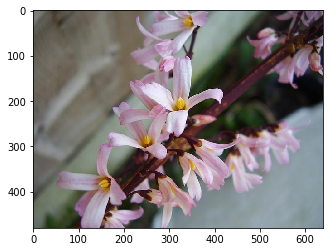

In [6]:
plt.imshow(src)

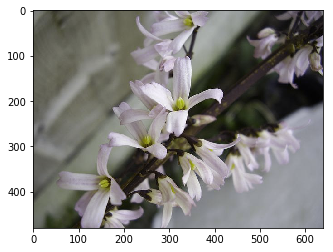

In [7]:
plt.imshow(xyz)

In [8]:
def xyz2rgb(xyz):
    X = xyz[:,:,0]
    Y = xyz[:,:,1]
    Z = xyz[:,:,2]
    R = (X * 55460 - Y * 213955 + Z * 1207070) >> 20  
    G = (X * -965985 + Y * 1967119 + Z * 47442) >> 20            # x * -965985 和 -x * 965985 在反汇编后是不一样的，后者多了个neg指令  
    B = (X * 3229543 - Y * 1611819 - Z * 569148) >> 20  
   
    dst = np.zeros_like(xyz)
    dst[:,:,0] = B
    dst[:,:,1] = G
    dst[:,:,2] = R
    
    return cv2.convertScaleAbs(dst)

In [9]:
rgb = xyz2rgb(xyz)

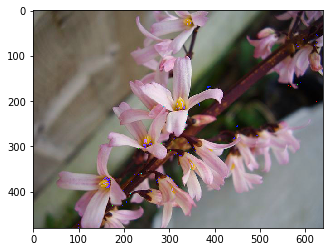

In [10]:
plt.imshow(rgb)